## RGB-D SLAM System

We implement a visual odometry and mapping system in an indoor space. Here we can extract the RGB image and point cloud information to get 3d-position for each pixel in the picture. Using RGB-D reduces the initialization issues in stereo cameras or dealing with unknown scale in the monocular camera case. The system here does not include a remapping stage [loop closure] which optimizes the entire map when a location has occured twice.


### RGB-D Cameras
As mentioned, the RGB-D camera takes an active approach to measuring pixel depth. The basic idea is the camera emits a light beam to the target object. There are two main-types:
- RGB-D sensor using structured infared light to measure pixel distance. Distance is measured base on returned structure of light pattern.
- Measures pixel distance using time of flight. Similar to laser/sonar the camera emits a light pulse to the target and determines distance according to the beam's time of flight.

In comparison to other methods, RGB-D is limited to application range, power consumption, and cost. Also, it has the greatest initial processing time interms of feature extaction, depth calculation etc. As an example: **During testing**, one step for stereo pose estimation tooks about 0.05 seconds, for the RGB-D case, it took 0.1 seconds due to image and pointcloud processing. **might be different if RGBD depth image was used instead**. However, during testing there the topic producing the depth image was inconsistent

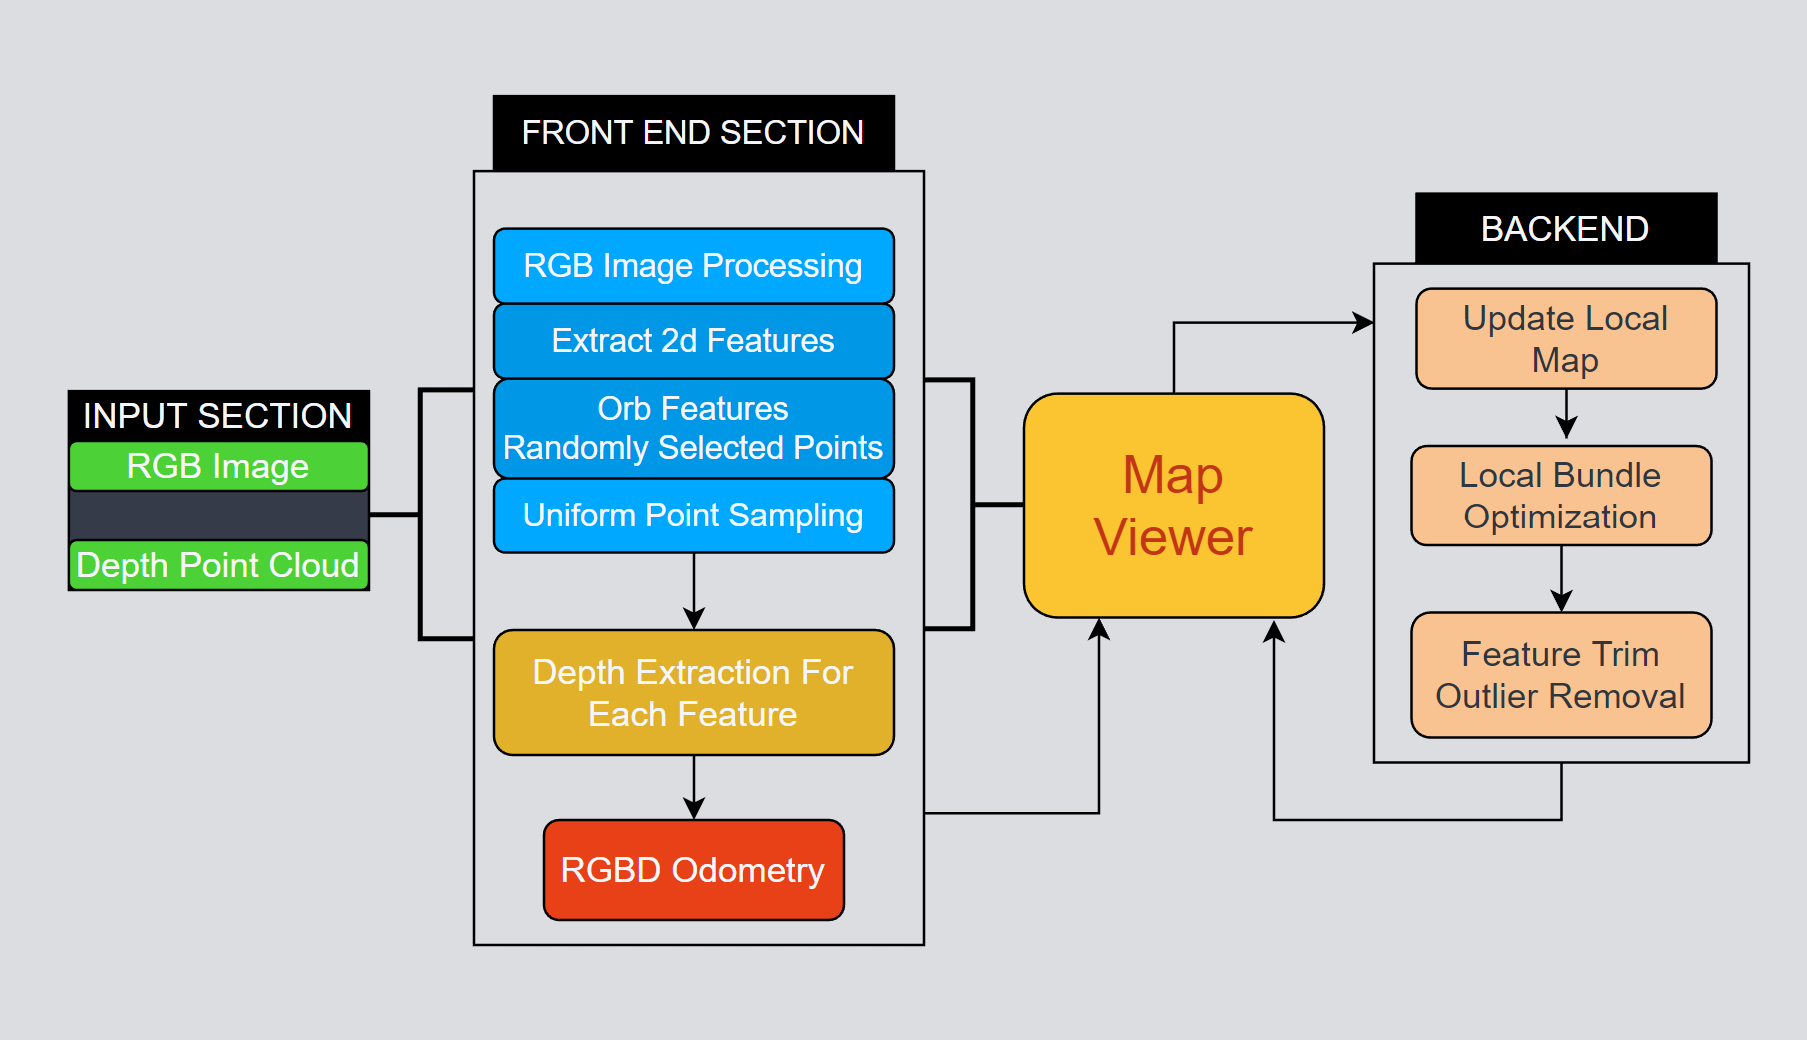

Image above shows the entire information flow for the system.

### System Brief:
**Frontend Sequence:**
- Using Orb descriptor and Randomly selected points with local gradient information as key points.
- Points are filtered using Poisson Sampling to distribute identified points evenly. Spacing out identified key points reduced redundant estimation. The 3d-distance for each key point is calculated from the point cloud.
- To speed up pose calculation, the Optical flow method matches features between sequential images. 
- Matched features are trimmed using RANSAC and InterQuartile Range to remove outliers and reduce the sample space.
- If the number of tracked keypoints is lower than a thresold, it will detect new features and create a keyframe.

**Backend Sequence:**
- Uses Pose Graph to estimate pose and optimize landmarks. A pose graph is a graph with nodes representing robot poses and edges linking nodes. The edges act as constraints and contain information like odometry measurements, image information, imu measurements, and generally, any data obtained within two-time frames. Through this, we can localize the robot and give an estimated sparse map of the environment. For more information, visit (https://www.youtube.com/watch?v=uHbRKvD8TWg&t=7s)

### Ros Overview:
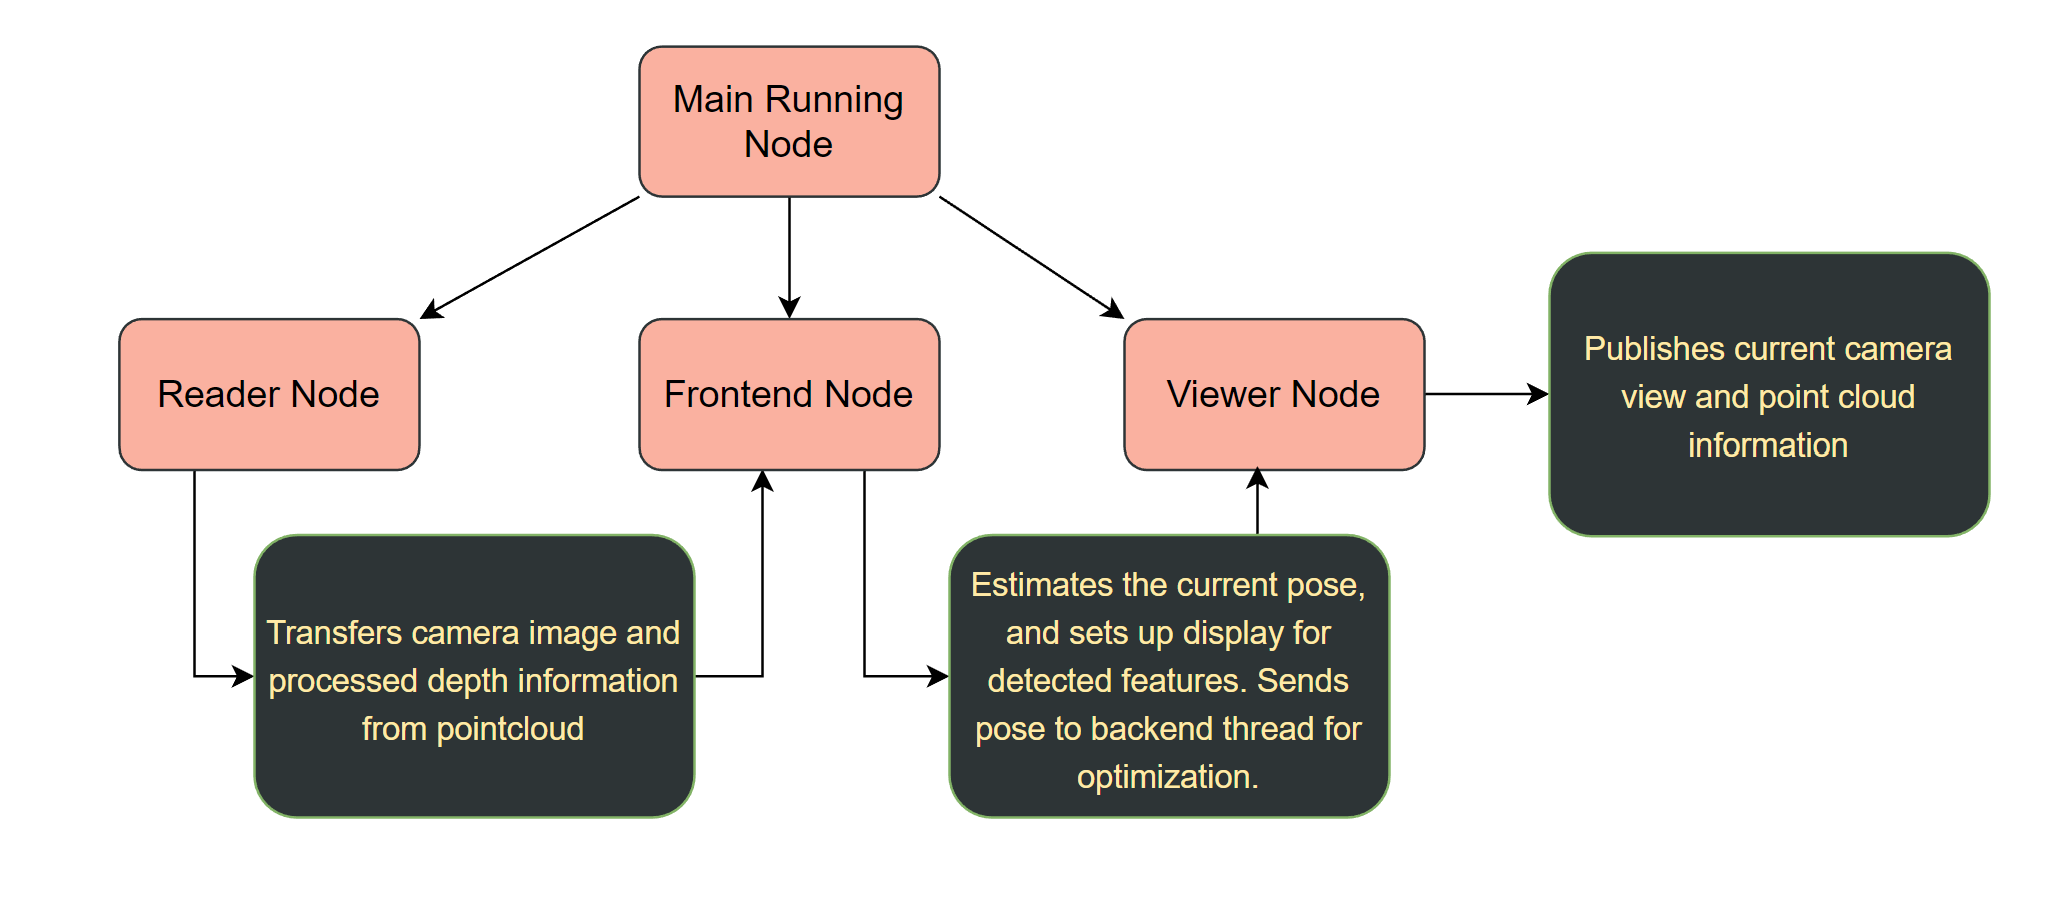

**Image above shows the overall workflow in Ros. The backend system is not implemented as a node since it didn't use any ros components. It operates as a singular external thread.** 

In [ ]:
// should get gif of system working

### Problems with Current Method:
- Limited Speed: 
     - Cameras cannot capture high speed motion, image becomes blurred and cannot extract features from it. 
     - It does not operate well in areas with low features or texture. So currently need to move at low speed to extract as much information as possible.                                                                                                                                                                                                                          
- No Loop Closure: Currently cannot perform a global map optimization to current previously estimated pose and landmarks. 
    - Popular loop closure method requires prior knowledge of the environment, and methods like Bag of words when used to describe and image cannot be updated real-time.
    

### Future Work: System Flow With Loop Closure
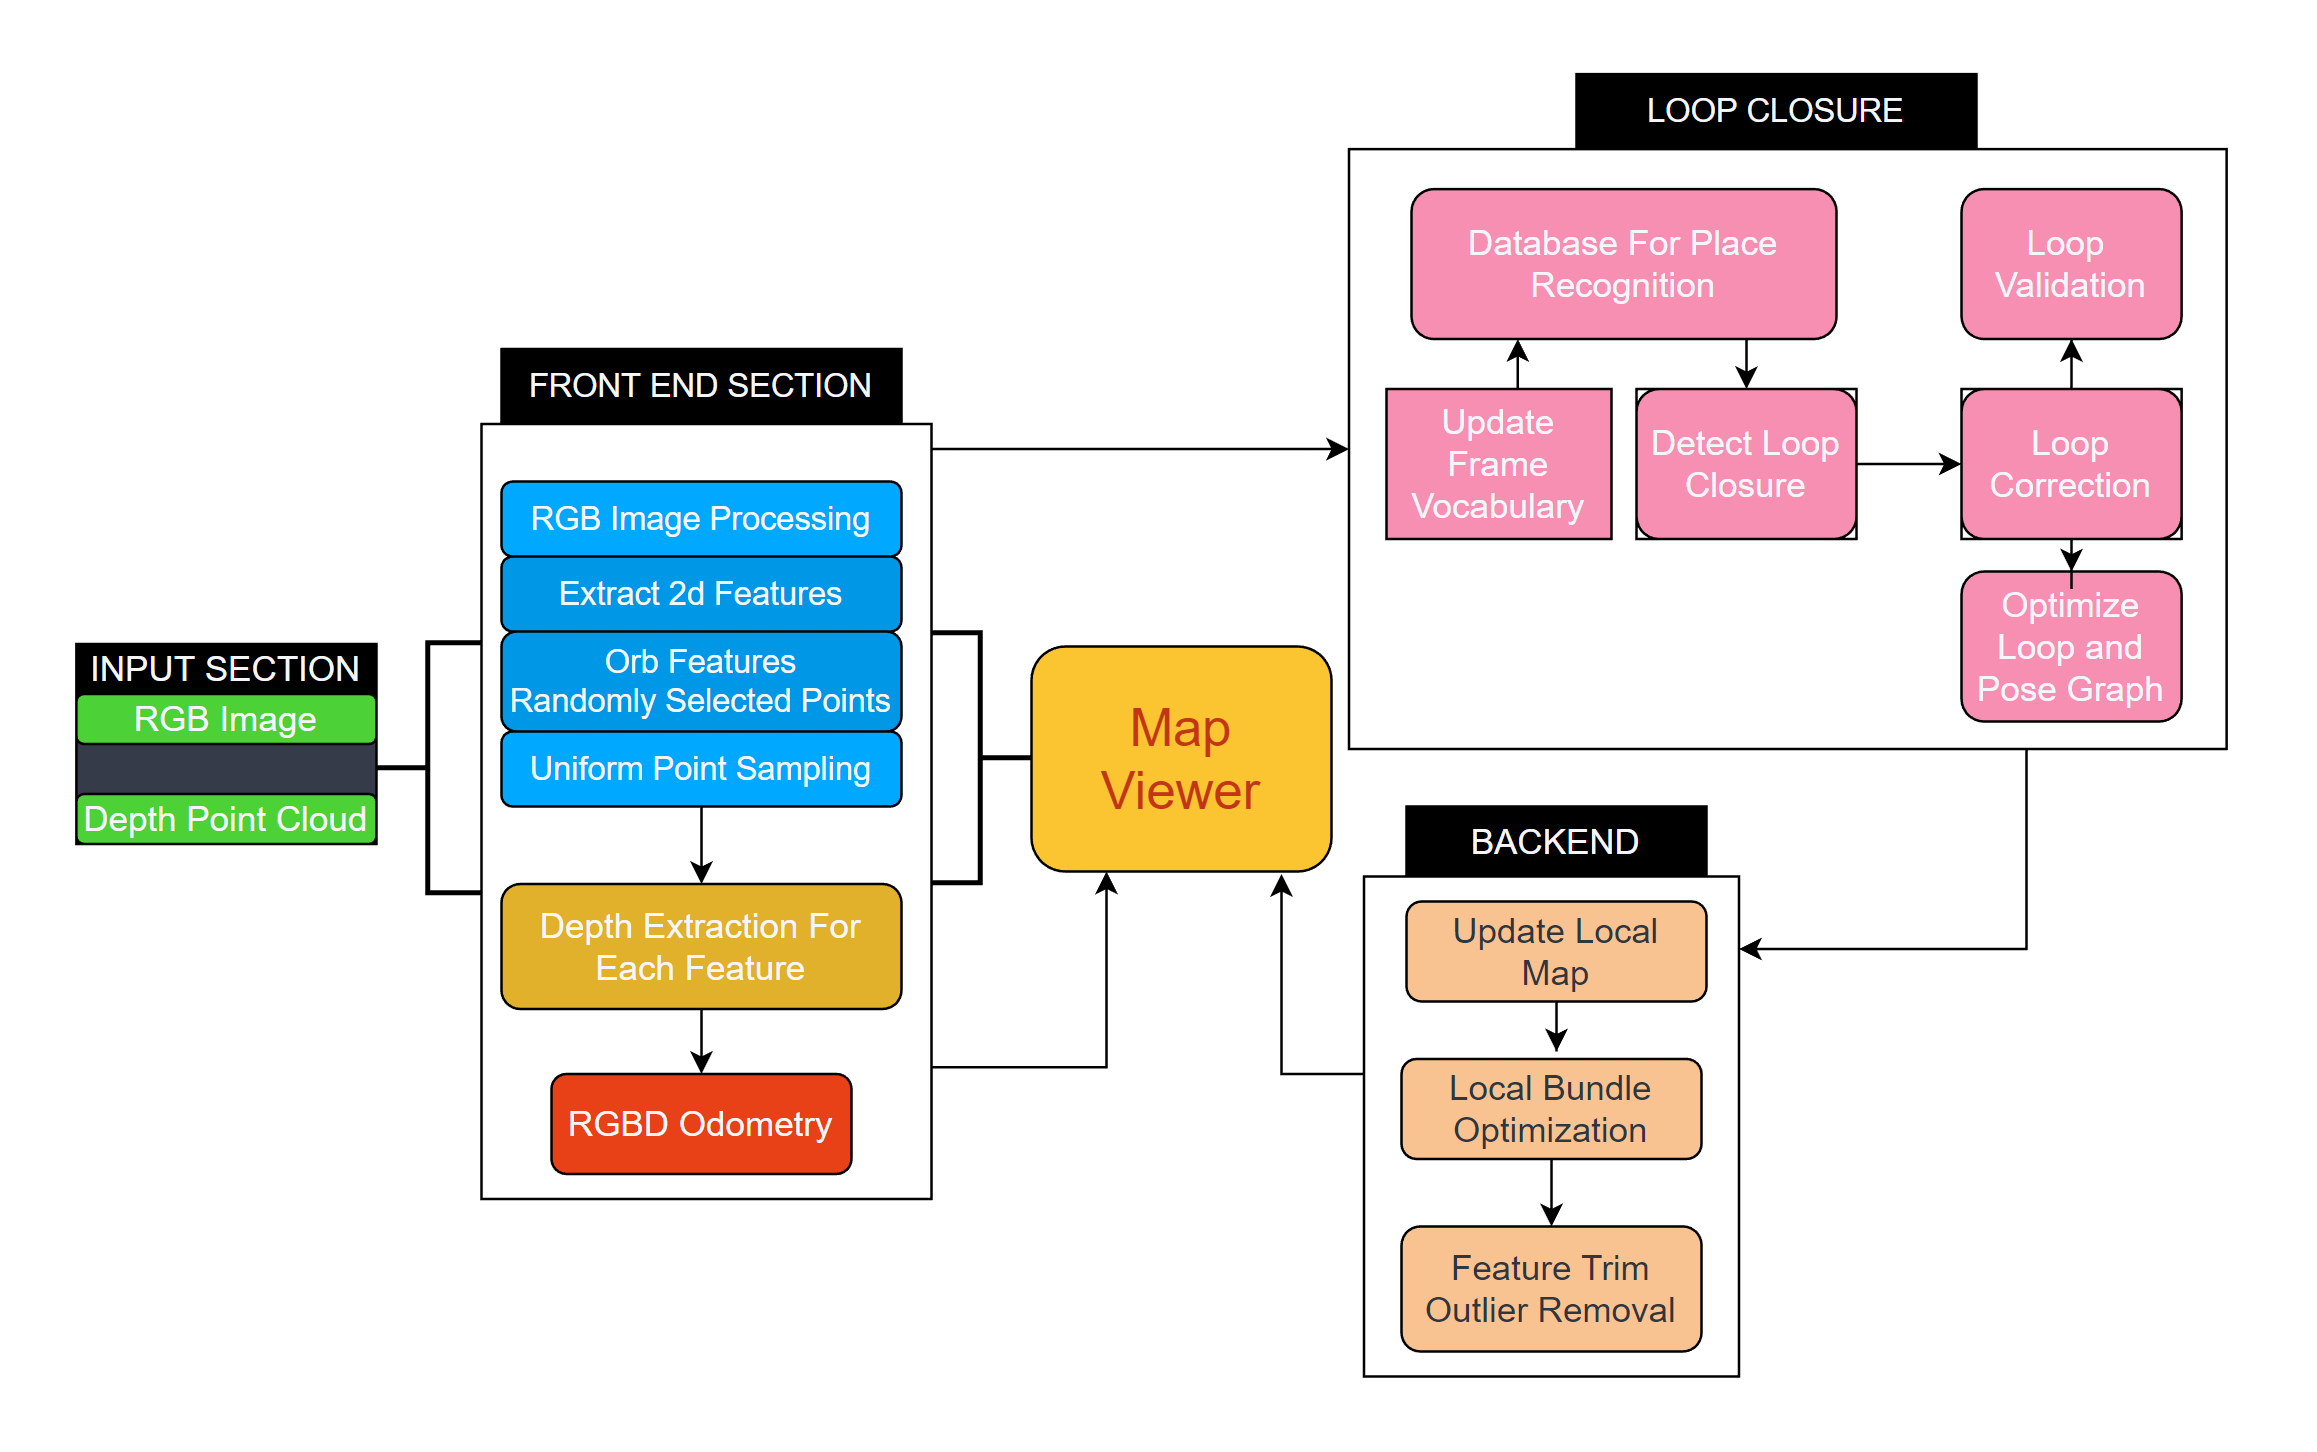

As mentioned earlier, loop closure allows for global landmark and pose estimation when a loop has been detected. A loop is detected when two images have high similarity implying the same location has been visited more than once. Leads to a more accurate map representation and pose estimation. The main hindrance to the Bag of Word approach is that it cannot be updated real-time and image matching can be really slow depending on voabulary size. To this end I propose a new method of describing image point locations for slam.

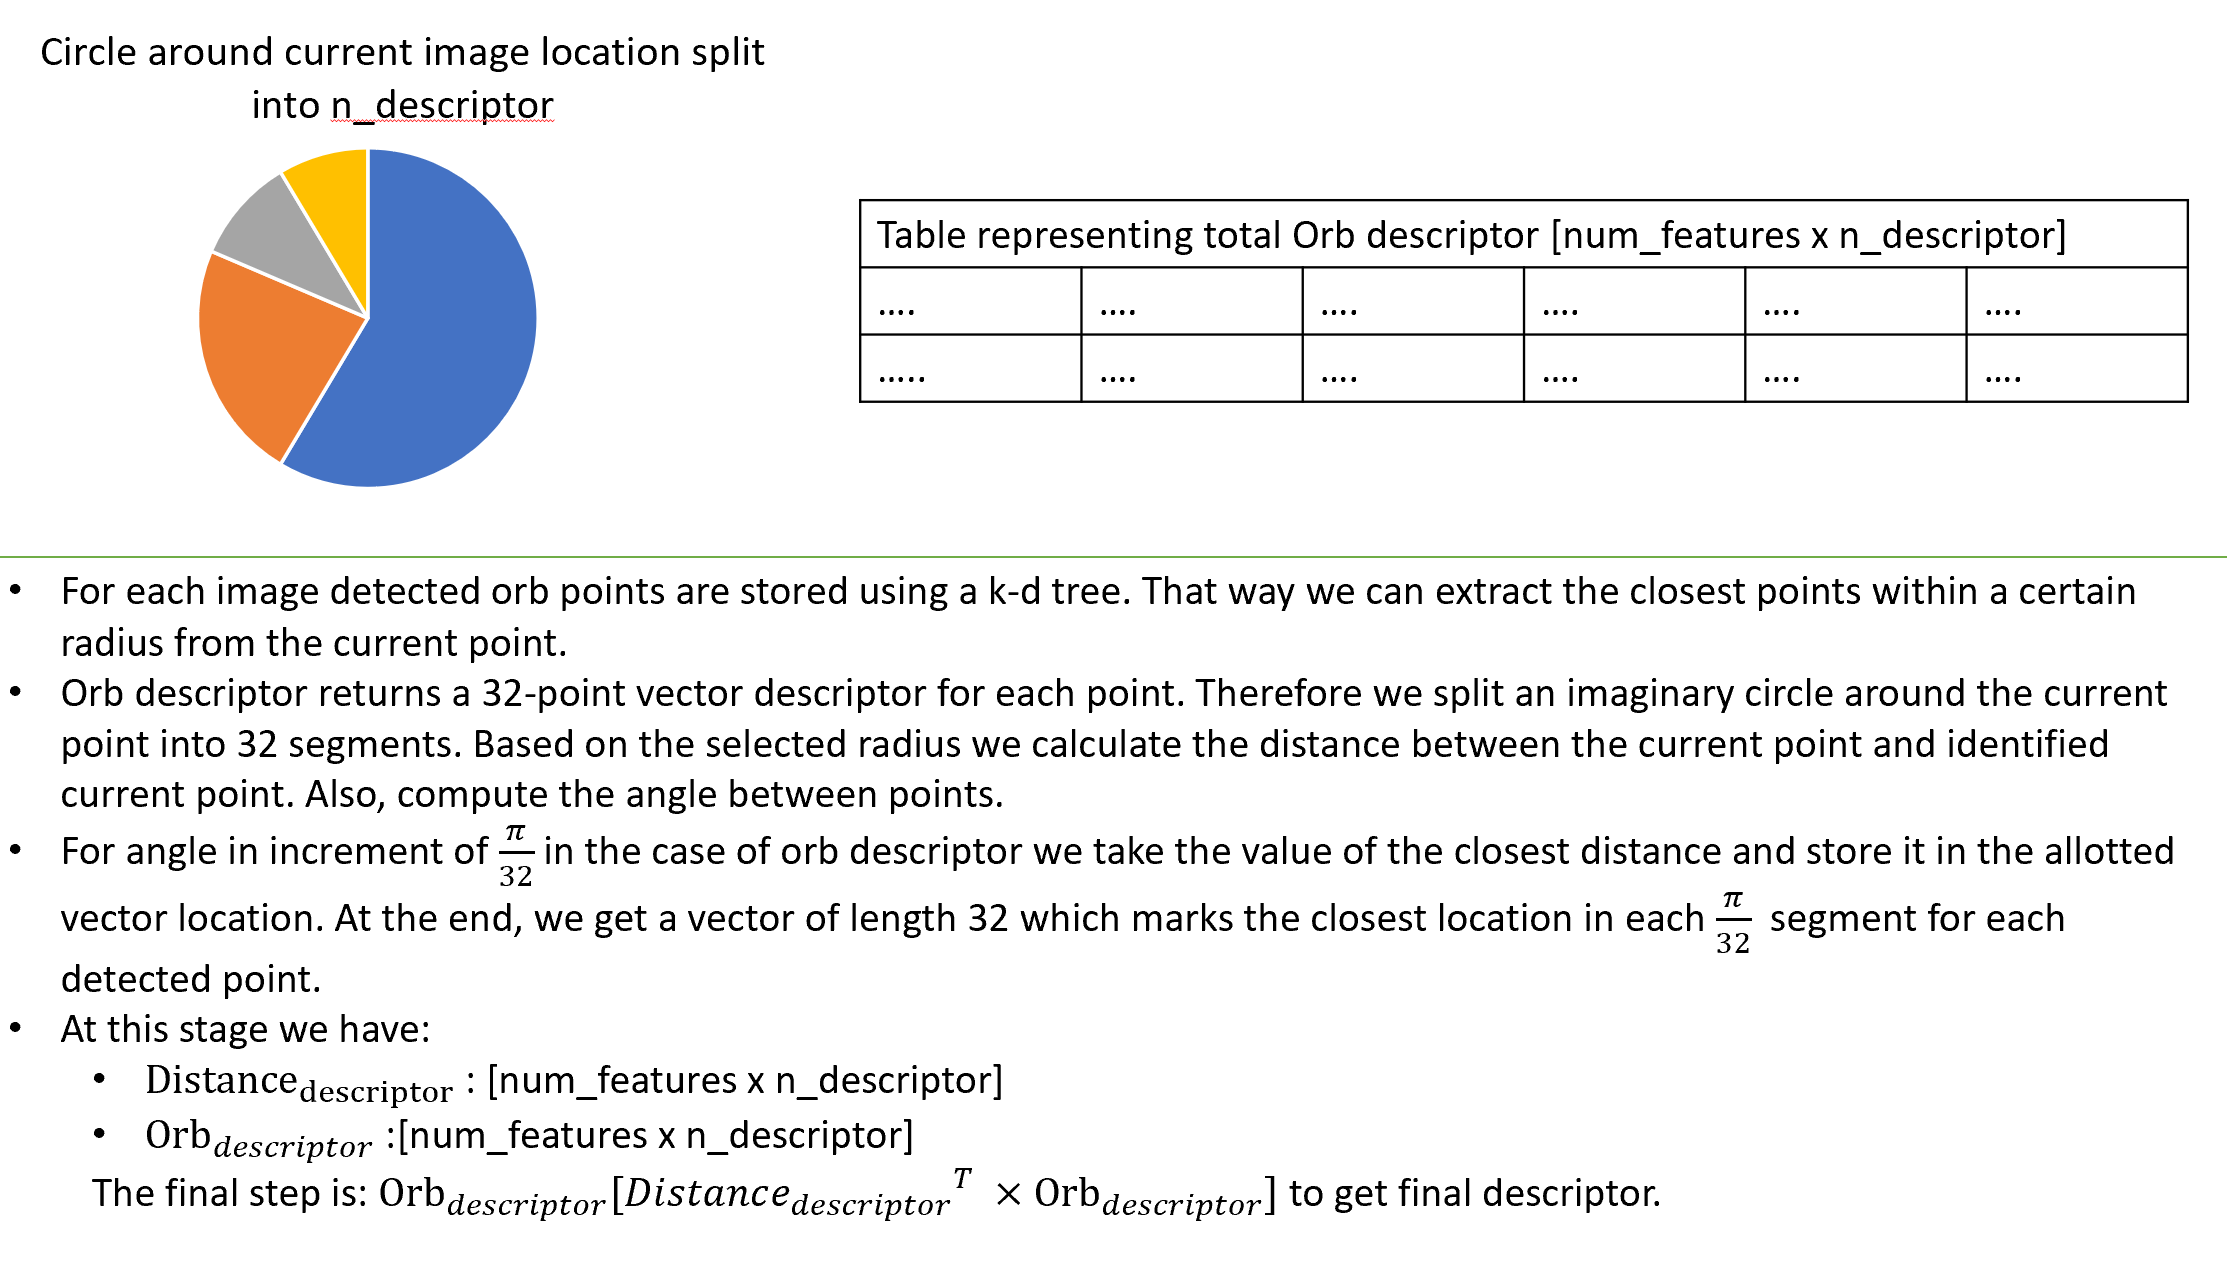

Following this, a combination of hastables with fixed size and cosine similarity to calculate vector similarity can be used to calculate image similarity. This should allow for realtime update. **More research to be done** 

### References
##### Visual SLAM: From Theory to Practice (https://github.com/gaoxiang12/slambook-en)
The section breakdowns are borrowed from Chapter 13, modified to match the RGB-D system, and include more advanced outlier methods.
##### Link3d: Linear Keypoints Representation for 3D LiDAR Point Cloud (https://arxiv.org/pdf/2206.05927.pdf)
Borrow Ideas from here to improve the loop closure system.  

### Dependencies Used


### OpenCV

Dowload and install instructions can be found [here](https://opencv.org/releases/). I am using OpenCV 4.5.4.

### Eigen

Can be installed using ``` sudo apt-get install libeigen3-dev ```.

### Sophus
Dowload and install instructions can be found [here](https://github.com/strasdat/Sophus).

### g2o
Dowload and install instructions can be found [here](https://github.com/RainerKuemmerle/g2o).